In [1]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Define dataset paths
dataset_root = r"C:\Users\furqu\OneDrive - UC Leuven-Limburg\Third year\Projects\Gassy\gass_GASSY\DBNet\yolo_dataset"

# Count images and labels in each split
def count_files(split_name):
    images_path = os.path.join(dataset_root, split_name, "images")
    labels_path = os.path.join(dataset_root, split_name, "labels")
    
    # Count image files
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    images = []
    for ext in image_extensions:
        images.extend(glob.glob(os.path.join(images_path, ext)))
    
    # Count label files
    labels = glob.glob(os.path.join(labels_path, "*.txt"))
    
    return len(images), len(labels)

# Collect statistics
splits = ['train', 'val', 'test']
dataset_stats = {}

for split in splits:
    num_images, num_labels = count_files(split)
    dataset_stats[split] = {
        'images': num_images,
        'labels': num_labels,
        'matched': min(num_images, num_labels),
        'images_without_labels': max(0, num_images - num_labels),
        'labels_without_images': max(0, num_labels - num_images)
    }

# Display statistics
print("Dataset Statistics:")
print("=" * 80)
for split, stats in dataset_stats.items():
    print(f"\n{split.upper()} SET:")
    print(f"  Images: {stats['images']}")
    print(f"  Labels: {stats['labels']}")
    print(f"  Matched pairs: {stats['matched']}")
    if stats['images_without_labels'] > 0:
        print(f"  ⚠️  Images without labels: {stats['images_without_labels']}")
    if stats['labels_without_images'] > 0:
        print(f"  ⚠️  Labels without images: {stats['labels_without_images']}")

# Calculate totals
total_images = sum(s['images'] for s in dataset_stats.values())
total_labels = sum(s['labels'] for s in dataset_stats.values())
total_matched = sum(s['matched'] for s in dataset_stats.values())

print(f"\n{'=' * 80}")
print(f"TOTAL DATASET:")
print(f"  Total Images: {total_images}")
print(f"  Total Labels: {total_labels}")
print(f"  Total Matched Pairs: {total_matched}")

Dataset Statistics:

TRAIN SET:
  Images: 214
  Labels: 214
  Matched pairs: 214

VAL SET:
  Images: 62
  Labels: 62
  Matched pairs: 62

TEST SET:
  Images: 31
  Labels: 31
  Matched pairs: 31

TOTAL DATASET:
  Total Images: 307
  Total Labels: 307
  Total Matched Pairs: 307


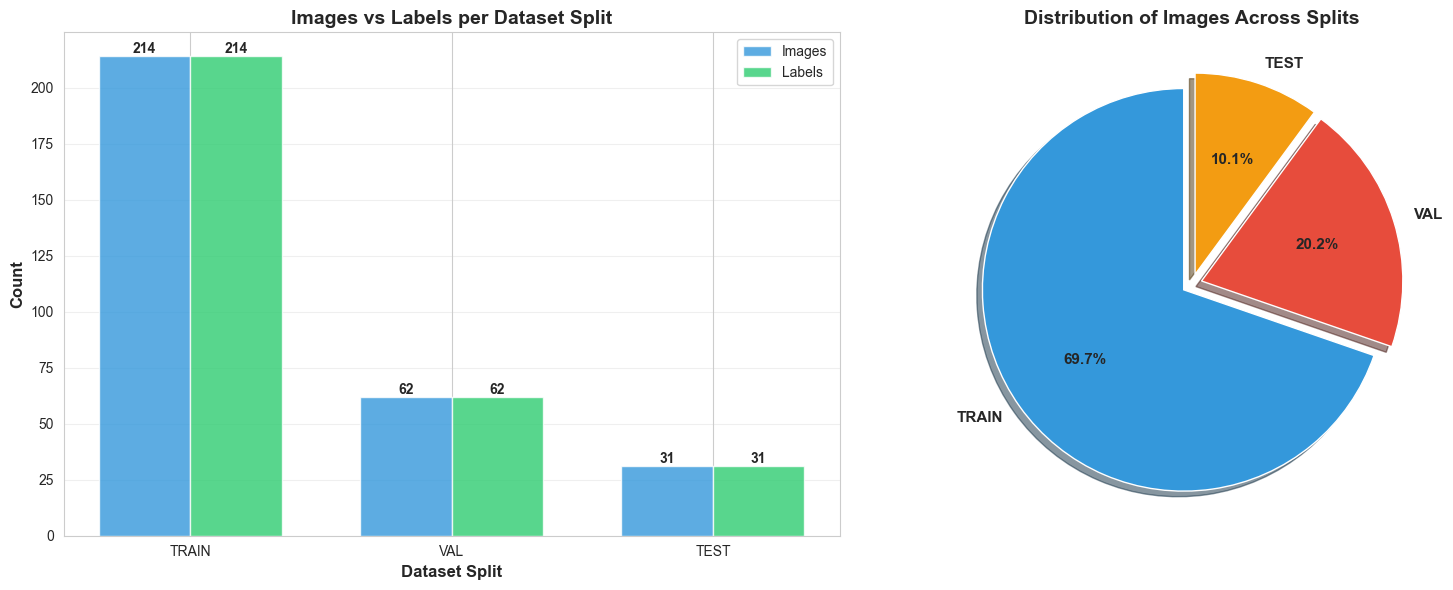

In [3]:
# Visualization 1: Bar chart comparing images and labels per split
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Images vs Labels per split
splits_list = list(dataset_stats.keys())
images_counts = [dataset_stats[s]['images'] for s in splits_list]
labels_counts = [dataset_stats[s]['labels'] for s in splits_list]

x = np.arange(len(splits_list))
width = 0.35

bars1 = axes[0].bar(x - width/2, images_counts, width, label='Images', color='#3498db', alpha=0.8)
bars2 = axes[0].bar(x + width/2, labels_counts, width, label='Labels', color='#2ecc71', alpha=0.8)

axes[0].set_xlabel('Dataset Split', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Images vs Labels per Dataset Split', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels([s.upper() for s in splits_list])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Pie chart of total distribution
sizes = [dataset_stats[s]['images'] for s in splits_list]
colors = ['#3498db', '#e74c3c', '#f39c12']
explode = (0.05, 0.05, 0.05)

axes[1].pie(sizes, explode=explode, labels=[s.upper() for s in splits_list], 
            colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Distribution of Images Across Splits', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

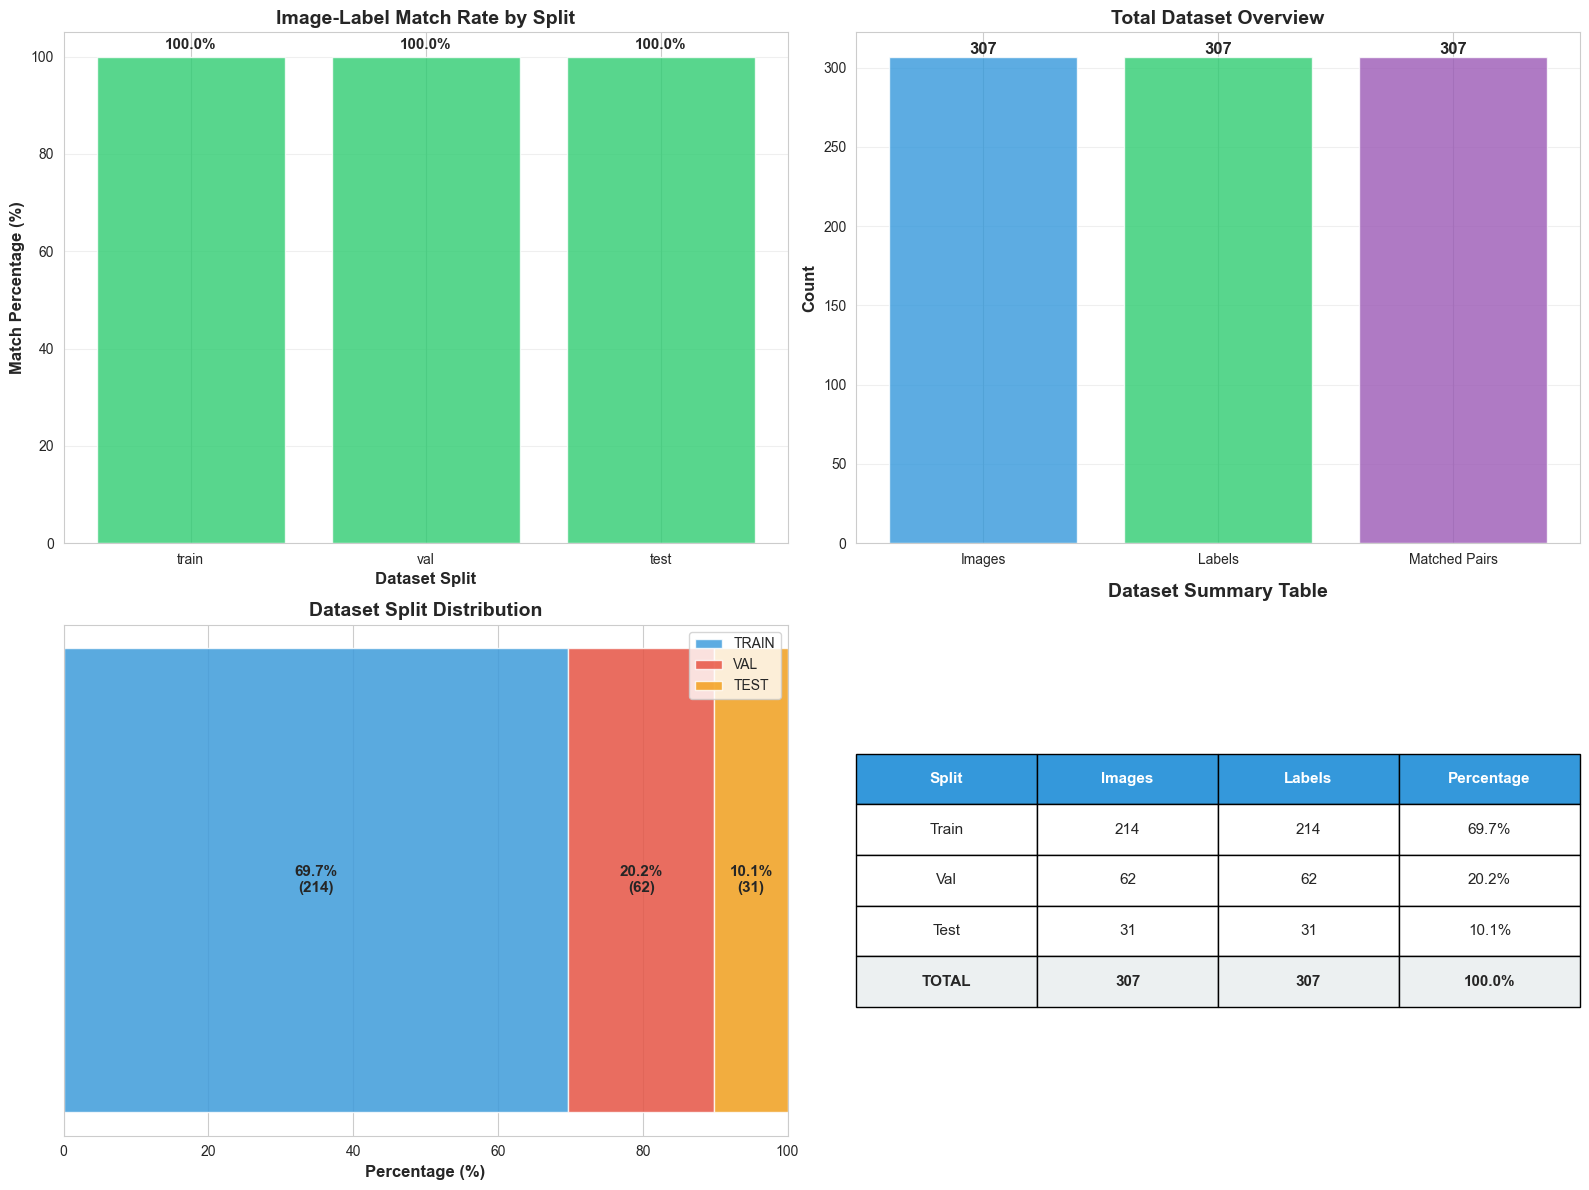

In [4]:
# Visualization 2: Dataset Quality Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Match percentage per split
match_percentages = []
for split in splits_list:
    total = dataset_stats[split]['images']
    matched = dataset_stats[split]['matched']
    percentage = (matched / total * 100) if total > 0 else 0
    match_percentages.append(percentage)

bars = axes[0, 0].bar(splits_list, match_percentages, color=['#2ecc71' if p == 100 else '#e74c3c' for p in match_percentages], alpha=0.8)
axes[0, 0].set_xlabel('Dataset Split', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Match Percentage (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Image-Label Match Rate by Split', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim([0, 105])
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (bar, pct) in enumerate(zip(bars, match_percentages)):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{pct:.1f}%',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Total counts comparison
categories = ['Images', 'Labels', 'Matched Pairs']
counts = [total_images, total_labels, total_matched]
colors_counts = ['#3498db', '#2ecc71', '#9b59b6']

bars = axes[0, 1].bar(categories, counts, color=colors_counts, alpha=0.8)
axes[0, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Total Dataset Overview', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot 3: Split size comparison (stacked)
train_pct = (dataset_stats['train']['images'] / total_images * 100) if total_images > 0 else 0
val_pct = (dataset_stats['val']['images'] / total_images * 100) if total_images > 0 else 0
test_pct = (dataset_stats['test']['images'] / total_images * 100) if total_images > 0 else 0

percentages = [train_pct, val_pct, test_pct]
colors_split = ['#3498db', '#e74c3c', '#f39c12']

bars = axes[1, 0].barh(['Dataset Split'], [100], color='lightgray', alpha=0.3)
left = 0
for i, (pct, color, split) in enumerate(zip(percentages, colors_split, splits_list)):
    bar = axes[1, 0].barh(['Dataset Split'], [pct], left=left, color=color, alpha=0.8, label=split.upper())
    axes[1, 0].text(left + pct/2, 0, f'{pct:.1f}%\n({dataset_stats[split]["images"]})',
                    ha='center', va='center', fontsize=11, fontweight='bold')
    left += pct

axes[1, 0].set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim([0, 100])
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_yticks([])

# Plot 4: Summary statistics table
summary_data = {
    'Split': ['Train', 'Val', 'Test', 'TOTAL'],
    'Images': [dataset_stats['train']['images'], 
               dataset_stats['val']['images'], 
               dataset_stats['test']['images'], 
               total_images],
    'Labels': [dataset_stats['train']['labels'], 
               dataset_stats['val']['labels'], 
               dataset_stats['test']['labels'], 
               total_labels],
    'Percentage': [f'{train_pct:.1f}%', 
                   f'{val_pct:.1f}%', 
                   f'{test_pct:.1f}%', 
                   '100.0%']
}

axes[1, 1].axis('tight')
axes[1, 1].axis('off')

table = axes[1, 1].table(cellText=[[summary_data['Split'][i], 
                                    summary_data['Images'][i], 
                                    summary_data['Labels'][i], 
                                    summary_data['Percentage'][i]] 
                                   for i in range(len(summary_data['Split']))],
                        colLabels=['Split', 'Images', 'Labels', 'Percentage'],
                        cellLoc='center',
                        loc='center',
                        colColours=['#3498db']*4)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header
for i in range(4):
    table[(0, i)].set_text_props(weight='bold', color='white')
    
# Style total row
for i in range(4):
    table[(4, i)].set_facecolor('#ecf0f1')
    table[(4, i)].set_text_props(weight='bold')

axes[1, 1].set_title('Dataset Summary Table', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [5]:
# Visualization 3: Analyze bounding boxes in labels (sample from train set)
def parse_yolo_label(label_path):
    """Parse YOLO format label file and return bounding box info"""
    boxes = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, width, height = map(float, parts[:5])
                    boxes.append({
                        'class': int(class_id),
                        'x_center': x_center,
                        'y_center': y_center,
                        'width': width,
                        'height': height,
                        'area': width * height
                    })
    except Exception as e:
        pass
    return boxes

# Analyze labels from train set
train_labels_path = os.path.join(dataset_root, 'train', 'labels')
label_files = glob.glob(os.path.join(train_labels_path, '*.txt'))

all_boxes = []
boxes_per_image = []

print(f"Analyzing {len(label_files)} label files...")

for label_file in label_files:
    boxes = parse_yolo_label(label_file)
    boxes_per_image.append(len(boxes))
    all_boxes.extend(boxes)

if all_boxes:
    # Extract box statistics
    widths = [box['width'] for box in all_boxes]
    heights = [box['height'] for box in all_boxes]
    areas = [box['area'] for box in all_boxes]
    
    print(f"\nBounding Box Statistics (from {len(all_boxes)} boxes):")
    print(f"  Average boxes per image: {np.mean(boxes_per_image):.2f}")
    print(f"  Max boxes in single image: {max(boxes_per_image)}")
    print(f"  Min boxes in single image: {min(boxes_per_image)}")
    print(f"  Average box width: {np.mean(widths):.4f}")
    print(f"  Average box height: {np.mean(heights):.4f}")
    print(f"  Average box area: {np.mean(areas):.4f}")
else:
    print("No bounding boxes found in labels!")

Analyzing 214 label files...

Bounding Box Statistics (from 217 boxes):
  Average boxes per image: 1.01
  Max boxes in single image: 2
  Min boxes in single image: 1
  Average box width: 0.2930
  Average box height: 0.1046
  Average box area: 0.0294

Bounding Box Statistics (from 217 boxes):
  Average boxes per image: 1.01
  Max boxes in single image: 2
  Min boxes in single image: 1
  Average box width: 0.2930
  Average box height: 0.1046
  Average box area: 0.0294


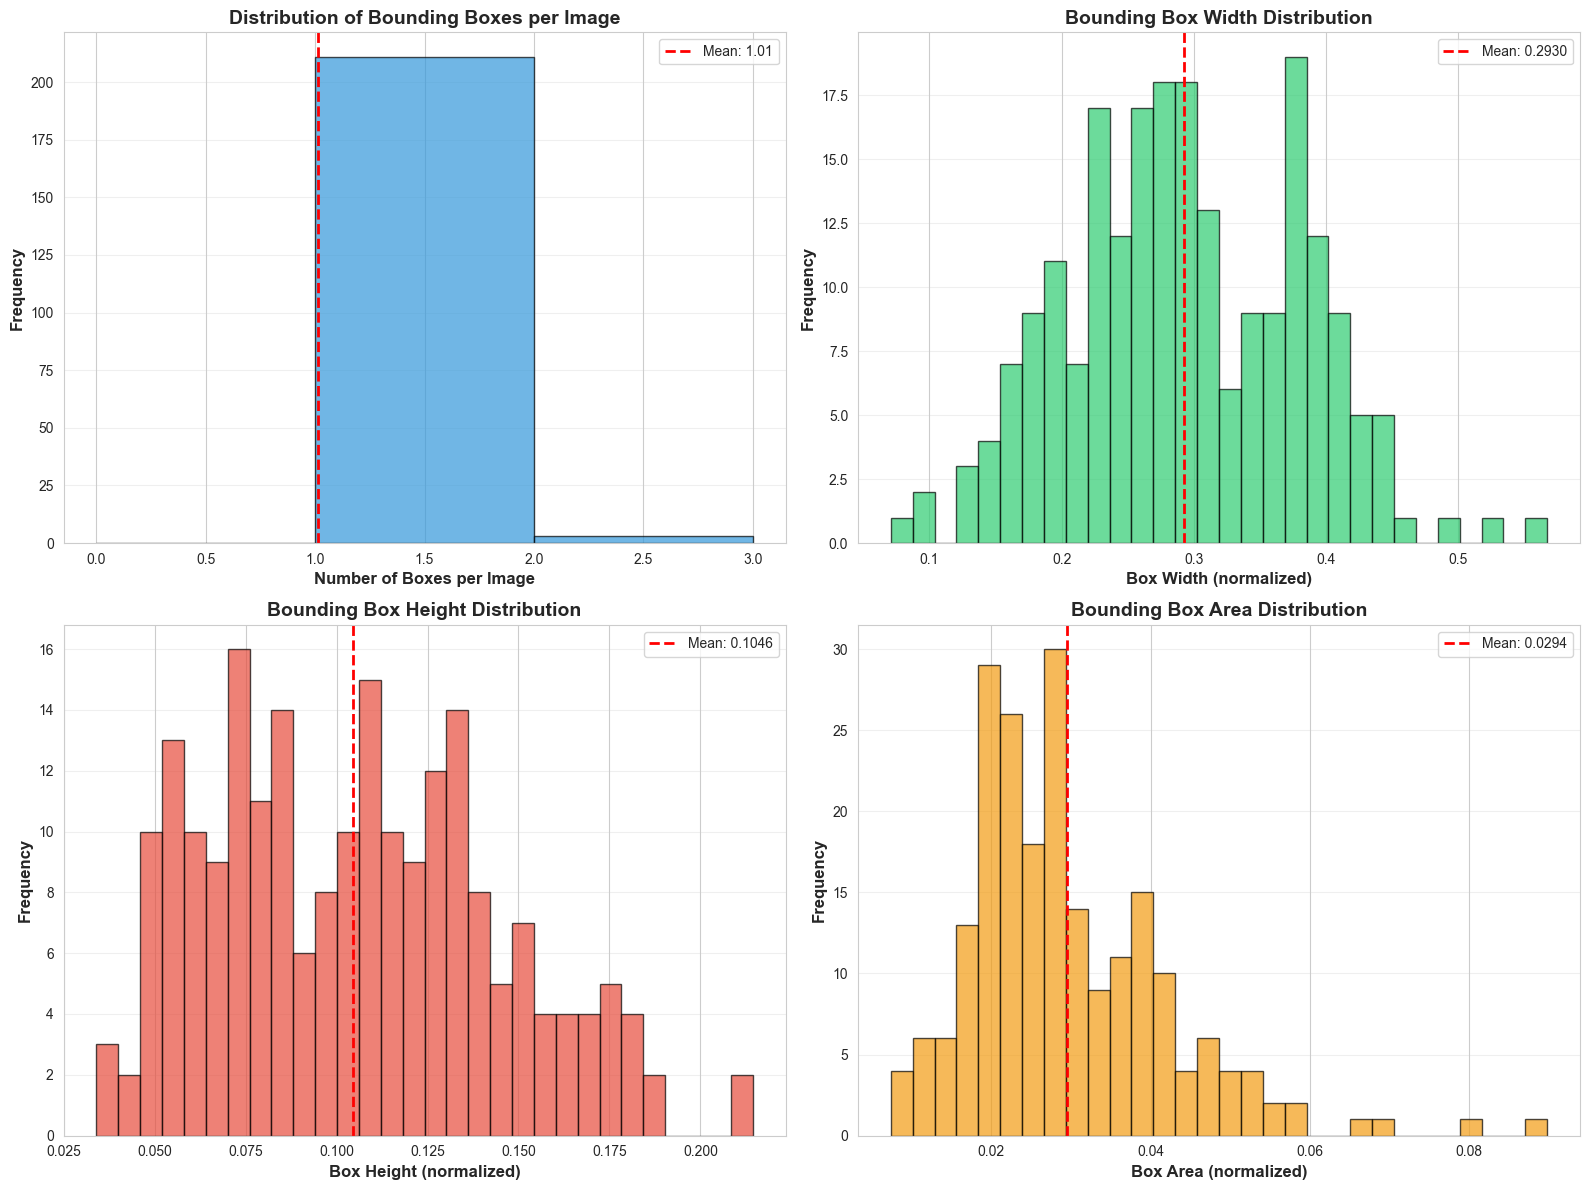

In [6]:
# Visualization 4: Bounding Box Distribution Analysis
if all_boxes:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Distribution of boxes per image
    axes[0, 0].hist(boxes_per_image, bins=range(0, max(boxes_per_image)+2), 
                    color='#3498db', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Number of Boxes per Image', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Distribution of Bounding Boxes per Image', fontsize=14, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].axvline(np.mean(boxes_per_image), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(boxes_per_image):.2f}')
    axes[0, 0].legend()
    
    # Plot 2: Box width distribution
    axes[0, 1].hist(widths, bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('Box Width (normalized)', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Bounding Box Width Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    axes[0, 1].axvline(np.mean(widths), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(widths):.4f}')
    axes[0, 1].legend()
    
    # Plot 3: Box height distribution
    axes[1, 0].hist(heights, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Box Height (normalized)', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Bounding Box Height Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].axvline(np.mean(heights), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(heights):.4f}')
    axes[1, 0].legend()
    
    # Plot 4: Box area distribution
    axes[1, 1].hist(areas, bins=30, color='#f39c12', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Box Area (normalized)', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Bounding Box Area Distribution', fontsize=14, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    axes[1, 1].axvline(np.mean(areas), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(areas):.4f}')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No bounding box data available for visualization.")

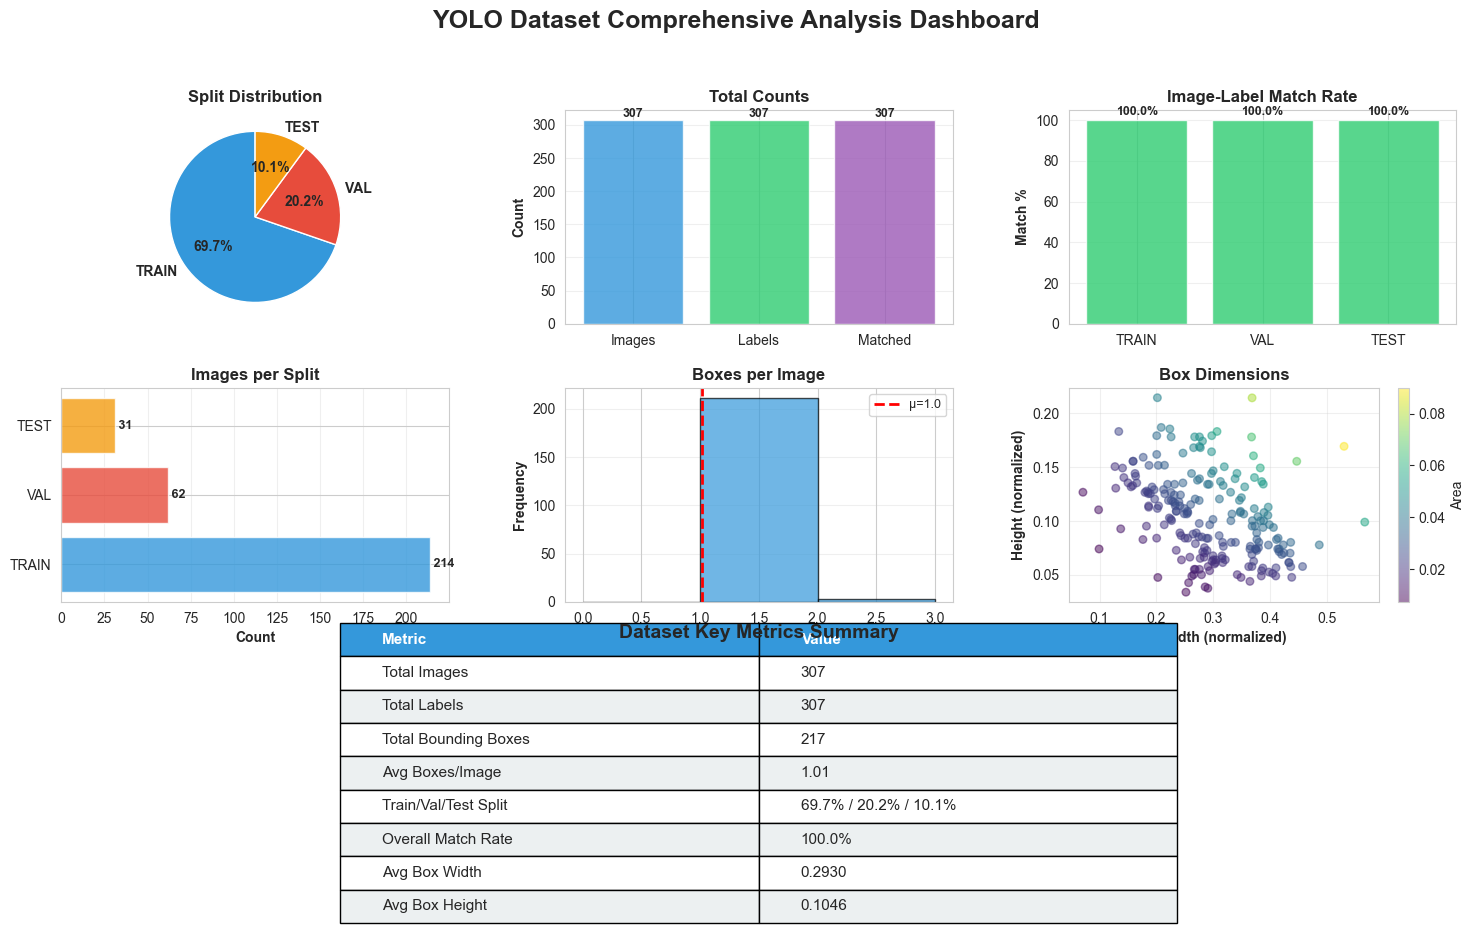


✅ Dataset analysis complete!


In [7]:
# Visualization 5: Comprehensive Summary Dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('YOLO Dataset Comprehensive Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Dataset Split Pie Chart
ax1 = fig.add_subplot(gs[0, 0])
sizes = [dataset_stats[s]['images'] for s in splits_list]
colors_pie = ['#3498db', '#e74c3c', '#f39c12']
ax1.pie(sizes, labels=[s.upper() for s in splits_list], colors=colors_pie, 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title('Split Distribution', fontsize=12, fontweight='bold')

# 2. Total Counts Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
categories = ['Images', 'Labels', 'Matched']
counts = [total_images, total_labels, total_matched]
bars = ax2.bar(categories, counts, color=['#3498db', '#2ecc71', '#9b59b6'], alpha=0.8)
ax2.set_title('Total Counts', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count', fontsize=10, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Match Rate per Split
ax3 = fig.add_subplot(gs[0, 2])
match_rates = [(dataset_stats[s]['matched']/dataset_stats[s]['images']*100) if dataset_stats[s]['images'] > 0 else 0 
               for s in splits_list]
bars = ax3.bar([s.upper() for s in splits_list], match_rates, 
               color=['#2ecc71' if r == 100 else '#e74c3c' for r in match_rates], alpha=0.8)
ax3.set_title('Image-Label Match Rate', fontsize=12, fontweight='bold')
ax3.set_ylabel('Match %', fontsize=10, fontweight='bold')
ax3.set_ylim([0, 105])
ax3.grid(axis='y', alpha=0.3)
for bar, rate in zip(bars, match_rates):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 4. Images per Split
ax4 = fig.add_subplot(gs[1, 0])
image_counts = [dataset_stats[s]['images'] for s in splits_list]
bars = ax4.barh([s.upper() for s in splits_list], image_counts, color=colors_pie, alpha=0.8)
ax4.set_title('Images per Split', fontsize=12, fontweight='bold')
ax4.set_xlabel('Count', fontsize=10, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for bar, count in zip(bars, image_counts):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)}', ha='left', va='center', fontsize=9, fontweight='bold')

# 5. Boxes per Image Distribution
if boxes_per_image:
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.hist(boxes_per_image, bins=range(0, max(boxes_per_image)+2), 
            color='#3498db', alpha=0.7, edgecolor='black')
    ax5.set_title('Boxes per Image', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Number of Boxes', fontsize=10, fontweight='bold')
    ax5.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax5.grid(axis='y', alpha=0.3)
    ax5.axvline(np.mean(boxes_per_image), color='red', linestyle='--', 
               linewidth=2, label=f'μ={np.mean(boxes_per_image):.1f}')
    ax5.legend(fontsize=9)

# 6. Box Size Scatter
if all_boxes:
    ax6 = fig.add_subplot(gs[1, 2])
    scatter = ax6.scatter(widths, heights, alpha=0.5, c=areas, cmap='viridis', s=30)
    ax6.set_title('Box Dimensions', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Width (normalized)', fontsize=10, fontweight='bold')
    ax6.set_ylabel('Height (normalized)', fontsize=10, fontweight='bold')
    ax6.grid(alpha=0.3)
    plt.colorbar(scatter, ax=ax6, label='Area')

# 7. Key Metrics Table
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('tight')
ax7.axis('off')

metrics_data = [
    ['Metric', 'Value'],
    ['Total Images', f'{total_images:,}'],
    ['Total Labels', f'{total_labels:,}'],
    ['Total Bounding Boxes', f'{len(all_boxes):,}' if all_boxes else 'N/A'],
    ['Avg Boxes/Image', f'{np.mean(boxes_per_image):.2f}' if boxes_per_image else 'N/A'],
    ['Train/Val/Test Split', f'{train_pct:.1f}% / {val_pct:.1f}% / {test_pct:.1f}%'],
    ['Overall Match Rate', f'{(total_matched/total_images*100):.1f}%' if total_images > 0 else 'N/A'],
    ['Avg Box Width', f'{np.mean(widths):.4f}' if all_boxes else 'N/A'],
    ['Avg Box Height', f'{np.mean(heights):.4f}' if all_boxes else 'N/A'],
]

table = ax7.table(cellText=metrics_data, cellLoc='left', loc='center',
                 colWidths=[0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Style header
for i in range(2):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(metrics_data)):
    for j in range(2):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#ecf0f1')

ax7.set_title('Dataset Key Metrics Summary', fontsize=14, fontweight='bold', pad=20)

plt.show()

print("\n✅ Dataset analysis complete!")